In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm import tqdm

import pandas as pd
import numpy as np
import random
import math
import os

from Utility import log
import config

In [2]:
train_test_split_percentage = 0.8
bins = 50
seed = 0

In [3]:
df = pd.read_csv(config.TRAIN_PATH, header=0, usecols=['target', 'comment_text'])

In [4]:
training_df, testing_df = train_test_split(df, test_size = 1.0 - train_test_split_percentage, random_state=seed)

## Imbalanced Data Graph

In [5]:
print(len(training_df), len(testing_df))

1443899 360975


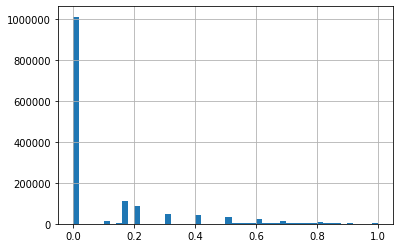

In [6]:
training_df.target.hist(bins=50)

## Random Undersampling

First we collect all of the data into bins.

In [7]:
x = {}
y = {}

In [8]:
for val in df.iterrows():
    target = val[1][0]
    bin_index = math.floor(target / (1/bins))
    
    if bin_index not in x:
        x[bin_index] = []
        y[bin_index] = []
        
    x[bin_index].append(val[1][1])
    y[bin_index].append(target)

Now we find the bin with the second most occurrences and the assocaited count.

In [9]:
counter = Counter()

for key in y:
    dictionary = {}
    dictionary[key] = len(y[key])
    counter.update(Counter(dictionary))

In [10]:
most_common = counter.most_common(2)
second_most_common_count = most_common[1][1]

Now we will randomly sample the most occurring column to reduce it to be no more common than the second most occurring.

In [11]:
most_common_key = most_common[0][0]
most_common_count = most_common[0][1]

In [12]:
random.seed(seed)
indexes = [i for i in range(most_common_count)]
indexes = random.sample(indexes, second_most_common_count)

In [13]:
new_x = []
new_y = []

In [14]:
for key in y:
    if key == most_common_key:
        for index in indexes:
            new_x.append(x[key][index])
            new_y.append(y[key][index])
    else:
        new_x.extend(x[key])
        new_y.extend(y[key])

Now we can create the dataframe and see the results of our hardwork undersampling.

In [15]:
data = {'target': new_y, 'comment_text': new_x}
df = pd.DataFrame(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21c13810>]],
      dtype=object)

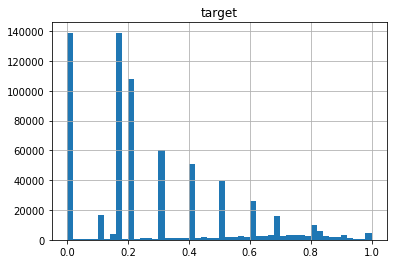

In [16]:
df.hist(bins=bins)

In [17]:
len(df)

678660